In [ ]:
%pip install sdv

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from sdv.datasets.local import load_csvs
from sdv.datasets.demo import download_demo

# This is the default folder name that the GOogle Colab notebook uses.
# Change this if you have your own folder with CSV files.
FOLDER_NAME = 'content/'

data = load_csvs(folder_name='/content/')

In [ ]:
data.keys()

dict_keys(['train'])

In [ ]:
train_set = data['real_train']

# use the head method to inspect the first few rows of the data
train_set.head(3)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,59.166.0.9,12425,149.171.126.3,80,6,7.0,1684,10168,14,18,27,1073,0,Benign
1,175.45.176.0,47135,149.171.126.16,8088,6,0.0,160,80,4,2,18,676,0,Benign
2,59.166.0.7,59116,149.171.126.5,21922,6,11.0,4968,3080,28,30,27,842,0,Benign


In [ ]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframes(data)

Auto detected data:



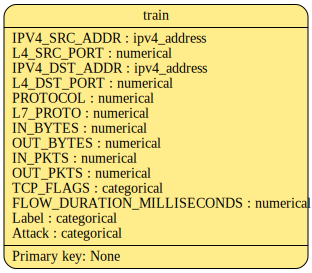

In [ ]:
print('Auto detected data:\n')
metadata.visualize()

In [ ]:
metadata.update_column(
    table_name='train',
    column_name='IPV4_SRC_ADDR',
    sdtype='ipv4_address',
    pii=True
)
metadata.update_column(
    table_name='train',
    column_name='L4_SRC_PORT',
    sdtype='numerical',
    computer_representation='UInt16'
)
metadata.update_column(
    table_name='train',
    column_name='IPV4_DST_ADDR',
    sdtype='ipv4_address',
    pii=True
)
metadata.update_column(
    table_name='train',
    column_name='L4_DST_PORT',
    sdtype='numerical',
    computer_representation='UInt16'
)
metadata.update_column(
    table_name='train',
    column_name='PROTOCOL',
    sdtype='categorical'
)
metadata.update_column(
    table_name='train',
    column_name='L7_PROTO',
    sdtype='categorical'
)
metadata.update_column(
    table_name='train',
    column_name='IN_BYTES',
    sdtype='numerical',
)
metadata.update_column(
    table_name='train',
    column_name='OUT_BYTES',
    sdtype='numerical',
)
metadata.update_column(
    table_name='train',
    column_name='IN_PKTS',
    sdtype='numerical',
)
metadata.update_column(
    table_name='train',
    column_name='OUT_PKTS',
    sdtype='numerical',
)
metadata.update_column(
    table_name='train',
    column_name='TCP_FLAGS',
    sdtype='categorical'
)
metadata.update_column(
    table_name='train',
    column_name='FLOW_DURATION_MILLISECONDS',
    sdtype='numerical',
)
metadata.update_column(
    table_name='train',
    column_name='Label',
    sdtype='categorical'
)
metadata.update_column(
    table_name='train',
    column_name='Attack',
    sdtype='categorical'
)

In [ ]:
metadata.validate()

In [ ]:
metadata.validate_data(data=data)

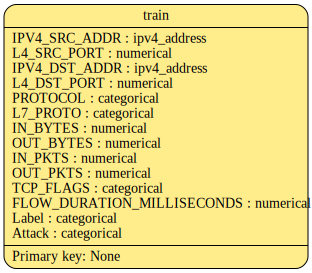

In [ ]:
metadata.visualize()

In [ ]:
metadata.save_to_json('metadata.json')

# in the future, you can reload the metadata object from the file
metadata = Metadata.load_from_json('metadata.json')

In [ ]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata, # required
    epochs=500,
    verbose=True,
    cuda=True
)
synthesizer.fit(train_set)

Gen. (-0.21) | Discrim. (-0.16): 100%|██████████| 500/500 [04:32<00:00,  1.84it/s]


In [ ]:
synthesizer.save(
    filepath='ctgan_synthesizer.pkl'
)

synthesizer = CTGANSynthesizer.load(
    filepath='ctgan_synthesizer.pkl'
)

In [ ]:
synthetic_train_set = synthesizer.sample(num_rows=len(train_set))

synthetic_train_set.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,171.41.106.10,61069,12.170.255.199,11427,6,36.0,2796,19174,37,41,27,0,0,Benign
1,146.186.194.108,11277,147.166.114.255,25930,17,11.0,2685,0,4,6,0,0,0,Benign
2,89.118.222.70,37006,8.28.104.65,370,17,0.0,52,0,1,5,0,0,0,Benign
3,125.139.134.248,60242,76.250.168.44,0,17,5.0,52,0,2,4,0,0,0,Benign
4,206.13.22.96,16268,25.182.235.93,0,6,41.0,13053,201,15,10,27,354,1,Exploits


In [ ]:
synthetic_train_set.to_csv('ctgan_synthetic_train.csv', index=False)